In [1]:
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from astropy.io import fits
import numpy as np
import cv2

Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
        amplitude            x_mean      ...      y_stddev            theta        
    ------------------ ----------------- ... ----------------- --------------------
    1.0463865926548237 3.735523168774692 ... 1.066497376135265 0.043799378999947944


3.735523168774692 3.850156504910113 1.519851133930348 1.066497376135265


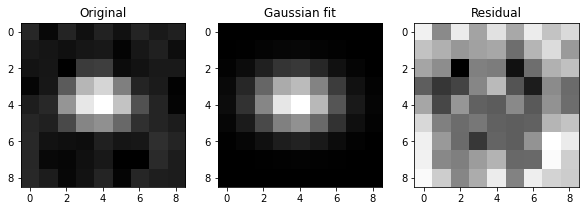

In [4]:
image = fits.getdata('psf.fits')
# or
# image = cv2.imread('psf.png',-1)

image = (image-np.min(image))/(np.max(image)-np.min(image))
cents = np.where(image == np.max(image))
yp, xp = image.shape
#print(cents)

# Generate grid of same size like box to put the fit on
y, x, = np.mgrid[:yp, :xp]

# Declare what function you want to fit to your data
f_init = models.Gaussian2D(amplitude=1., x_mean=cents[1][0], y_mean=cents[0][0], x_stddev=1., y_stddev=1.,theta=0)

# Declare what fitting function you want to use
fit_f = fitting.LevMarLSQFitter()

# Fit the model to your data (box)
f = fit_f(f_init, x, y, image)

print(f)
print('\n')
print(f.x_mean.value, f.y_mean.value, f.x_stddev.value, f.y_stddev.value)

# Plot the data with the best-fit model
fig = plt.figure(figsize=(10, 5), facecolor='white')
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(f(x, y), cmap='gray')
plt.title("Gaussian fit")
plt.subplot(1, 3, 3) 
plt.imshow(image - f(x, y), cmap='gray')
plt.title("Residual")
plt.show()

#fig.savefig('fit2d.png')